<a href="https://colab.research.google.com/github/iamwendellbalagot/google-colab/blob/master/Permutation_Test_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import datasets

plt.style.use('ggplot')
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

In [14]:
irisd = datasets.load_iris()

In [15]:
feat_set = irisd.data[np.where(irisd.target[:]==0)[0],:2]
#Versicolor:
feat_ver = irisd.data[np.where(irisd.target[:]==1)[0],:2]
#Virginica:
feat_vir = irisd.data[np.where(irisd.target[:]==2)[0],:2]

In [38]:
pV = np.array(list(feat_ver[:, 0]) + list(feat_vir[:,0]))

In [24]:
mean_a  = np.mean(feat_ver[:,0])
mean_b  = np.mean(feat_vir[:,0])

In [51]:
def permutate(x, n1,n2):
  n = n1 + n2
  idx_b = np.random.choice(np.arange(n), n1, replace=False)
  idx_a = np.array(list(set(np.arange(n)) - set(idx_b)))
  mean_diff = np.abs(np.mean(x[idx_b]) - np.mean(x[idx_a]))
  return mean_diff

In [56]:
perm_diff = np.zeros(1000)

for i in range(1000):
  perm_diff[i] = permutate(pV, 50,50)

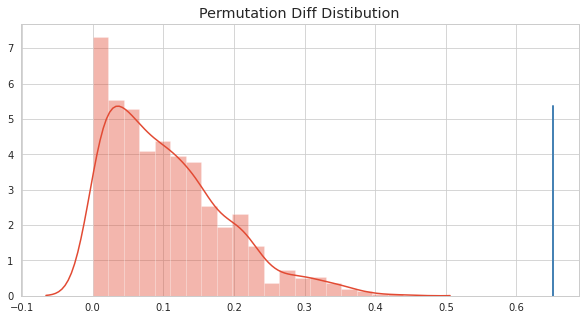

In [74]:
plt.figure(figsize=(10,5))
plt.title('Permutation Diff Distibution')
sns.distplot(perm_diff);
plt.axvline(np.abs(mean_a-mean_b), 0, 0.7, lw=2, color='steelblue');

In [81]:
stats.ttest_ind(feat_ver[:,0], feat_vir[:,0])

Ttest_indResult(statistic=-5.629165259719801, pvalue=1.7248563024547942e-07)

In [82]:
mean_a  = np.mean(feat_ver[:,1])
mean_b  = np.mean(feat_vir[:,1])

In [83]:
pV2 = np.array(list(feat_ver[:, 1]) + list(feat_vir[:,1]))
perm_diff = np.zeros(1000)

for i in range(1000):
  perm_diff[i] = permutate(pV2, 50,50)

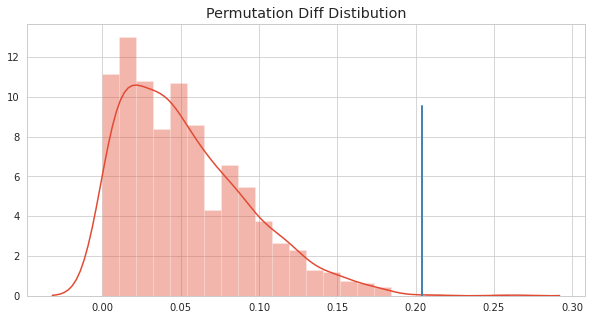

In [84]:
plt.figure(figsize=(10,5))
plt.title('Permutation Diff Distibution')
sns.distplot(perm_diff);
plt.axvline(np.abs(mean_a-mean_b), 0, 0.7, lw=2, color='steelblue');

In [86]:
np.mean(perm_diff[np.where(perm_diff > abs(mean_a-mean_b))])

0.23399999999999976

In [87]:
stats.ttest_ind(feat_ver[:,1], feat_vir[:,1])

Ttest_indResult(statistic=-3.2057607502218186, pvalue=0.0018191004238894803)

0.20399999999999974